<a href="https://colab.research.google.com/github/diegol99/CasoEstudio_Seguros/blob/main/Finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias y lecturas de BD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objects as go ## Para gráficos

# Para ejecutar sql y conectarse a bd

conn = sql.connect('/content/drive/MyDrive/Analitica 3/Financiero/BD_insurance2019dataset.db') ## Crear cuando no existe el nombre cd y conectarse cuando si existe
cur=conn.cursor() # Para funciones que ejecutan sql en base de datos
cur.execute ("SELECT name FROM sqlite_master Where type = 'table';")
print(cur.fetchall())

[('reclamaciones',), ('diagnosticos',), ('regional',), ('genero',), ('sociodemograficas',), ('utilizaciones',)]


##Tipos de datos de BD:

In [ ]:
def tiposdatos (x):
    return x.dtypes

In [ ]:
reclam = pd.read_sql('SELECT * FROM reclamaciones', conn) ##Tipos de reclamaciones: Atención del parto, Atencion integral de salud mental
diag = pd.read_sql('SELECT * FROM diagnosticos', conn) ## Diagnosticos de los pacientes
regional = pd.read_sql('SELECT * FROM regional', conn) ## Lugares 
genero = pd.read_sql('SELECT * FROM genero', conn) #Genero
sociodemo = pd.read_sql('SELECT * FROM sociodemograficas', conn) ## datos de pacientes sociodemograficos
util = pd.read_sql('SELECT * FROM utilizaciones', conn) ##información completa del paciencie con su precio

In [ ]:
util["Diagnostico_Codigo"].value_counts()

9       343246
Z108      6773
Z017      6470
E039      2441
E139      1086
         ...  
I260         1
Q658         1
Q420         1
F116         1
M619         1
Name: Diagnostico_Codigo, Length: 2724, dtype: int64

In [ ]:
print(tiposdatos(reclam))
print(tiposdatos(diag))
print(tiposdatos(regional))
print(tiposdatos(genero))

Reclamacion_Id       int64
Reclamacion_Desc    object
dtype: object
Diagnostico_Codigo    object
Diagnostico_Desc      object
dtype: object
Regional_id       int64
Regional_Desc    object
dtype: object
Sexo_Cd      object
Sexo_desc    object
dtype: object


In [ ]:
tiposdatos(sociodemo)

Afiliado_Id            int64
Sexo_codigo           object
FechaNacimiento        int64
Regional_codigo       object
CANCER                 int64
EPOC                   int64
DIABETES               int64
HIPERTENSION           int64
ENF_CARDIOVASCULAR     int64
dtype: object

In [ ]:
tiposdatos(util)

Fecha_Reclamacion      object
Afiliado_Id             int64
Reclamacion_codigo     object
Diagnostico_Codigo     object
Cantidad              float64
Precio                float64
dtype: object

In [ ]:
sociodemo.describe()

,Afiliado_Id,FechaNacimiento,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
count,2.182050e+05,218205.000000,218205.000000,218205.000000,218205.000000,218205.000000,218205.000000
mean,2.470483e+07,31646.927156,0.019014,0.005114,0.014844,0.069600,0.004047
std,1.694923e+07,7114.943973,0.136575,0.071332,0.120928,0.254472,0.063485
min,7.382880e+05,5146.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.569969e+06,26913.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.350590e+07,31194.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.913018e+07,37507.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.957157e+07,45387.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
util.describe()

,Afiliado_Id,Cantidad,Precio
count,3.958680e+05,395868.000000,3.958680e+05
mean,2.094687e+07,1.504469,2.896047e+05
std,1.653072e+07,2.343573,2.088676e+06
min,7.382880e+05,0.000000,2.480000e+00
25%,5.742196e+06,1.000000,5.415080e+04
50%,1.657348e+07,1.000000,6.810266e+04
75%,3.422113e+07,1.000000,1.423250e+05
max,5.956476e+07,210.000000,5.410007e+08


In [ ]:
sociodemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218205 entries, 0 to 218204
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Afiliado_Id         218205 non-null  int64 
 1   Sexo_codigo         218205 non-null  object
 2   FechaNacimiento     218205 non-null  int64 
 3   Regional_codigo     218205 non-null  object
 4   CANCER              218205 non-null  int64 
 5   EPOC                218205 non-null  int64 
 6   DIABETES            218205 non-null  int64 
 7   HIPERTENSION        218205 non-null  int64 
 8   ENF_CARDIOVASCULAR  218205 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 15.0+ MB


In [ ]:
util.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395868 entries, 0 to 395867
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Fecha_Reclamacion   395868 non-null  object 
 1   Afiliado_Id         395868 non-null  int64  
 2   Reclamacion_codigo  395868 non-null  object 
 3   Diagnostico_Codigo  395868 non-null  object 
 4   Cantidad            395868 non-null  float64
 5   Precio              395868 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.1+ MB


## *Util SQL*

In [ ]:
util["Fecha_Reclamacion"] = pd.to_datetime(util["Fecha_Reclamacion"])
import plotly.express as px
util["Fecha_Reclamacion"] = util["Fecha_Reclamacion"].dt.year
retfecha= util.groupby(["Fecha_Reclamacion"])[["Afiliado_Id"]].count().reset_index()
fig = px.line(retfecha, x='Fecha_Reclamacion', y =['Afiliado_Id'], title = '<b>Reclamaciones Anuales<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
   legend_title = 'Afiliados',
    xaxis_title = '<b>Años<b>',
    yaxis_title = '<b>Cantidad de usuarios<b>',
)
fig.show()

<ipython-input-101-9d3af3611d6c>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
##Serie de tiempo para los meses donde más se han reclamado
reclam = pd.read_sql('SELECT * FROM reclamaciones', conn) ##Tipos de reclamaciones: Atención del parto, Atencion integral de salud mental
diag = pd.read_sql('SELECT * FROM diagnosticos', conn) ## Diagnosticos de los pacientes
regional = pd.read_sql('SELECT * FROM regional', conn) ## Lugares 
genero = pd.read_sql('SELECT * FROM genero', conn) #Genero
sociodemo = pd.read_sql('SELECT * FROM sociodemograficas', conn) ## datos de pacientes
util = pd.read_sql('SELECT * FROM utilizaciones', conn) ##
util["Fecha_Reclamacion"] = pd.to_datetime(util["Fecha_Reclamacion"])
import plotly.express as px
util["Fecha_Reclamacion"] = util["Fecha_Reclamacion"].dt.month
retfecha= util.groupby(["Fecha_Reclamacion"])[["Afiliado_Id"]].count().reset_index()
fig = px.line(retfecha, x='Fecha_Reclamacion', y =['Afiliado_Id'], title = '<b>Reclamaciones en el 2019<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
   legend_title = 'Afiliados',
    xaxis_title = '<b>Mes<b>',
    yaxis_title = '<b>Cantidad de usuarios<b>',
)
fig.show()

<ipython-input-102-7e85d709bd49>:8: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
## Numero de reclamaciones por afiliado
pd.read_sql('SELECT Afiliado_Id, count(Afiliado_Id) as Cantidad FROM utilizaciones GROUP BY Afiliado_Id ORDER BY Cantidad DESC LIMIT 5;', conn)

,Afiliado_Id,Cantidad
0,24695323,173
1,56682173,124
2,9732625,60
3,32520762,52
4,40867244,51


In [ ]:
##Cantidad por reclamaciones 

numreclam = pd.read_sql('''SELECT Reclamacion_Desc as 'Tipo de Reclamo', count(Reclamacion_codigo) as Cantidad FROM utilizaciones 
                            INNER JOIN reclamaciones
                            ON utilizaciones.Reclamacion_codigo = reclamaciones.Reclamacion_Id
                            GROUP BY Reclamacion_codigo 
                            ORDER BY Cantidad DESC 
                            LIMIT 5;''', conn)
numreclam

,Tipo de Reclamo,Cantidad
0,CONSULTA EXTERNA,154150
1,EXAMENES DE DIAGNOSTICO,73311
2,LABORATORIO CLINICO,56405
3,CONSULTA DE URGENCIAS,38241
4,FISIOTERAPIA ILIMITADA,38121


In [ ]:
##Hacer inner join para que salgan los nombres de los diagnosticos
##Cantidad por los diagnosticos
Diagnonum = pd.read_sql('''SELECT Diagnostico_Codigo,count(Diagnostico_Codigo) as Cantidad FROM utilizaciones
                            GROUP BY Diagnostico_Codigo
                            ORDER BY Cantidad DESC
                            LIMIT 12
                            ;''', conn)
Diagnonum

,Diagnostico_Codigo,Cantidad
0,9,343246
1,Z108,6773
2,Z017,6470
3,E039,2441
4,E139,1086
5,E119,967
6,R529,898
7,Z018,832
8,Z321,690
9,Z008,630


In [ ]:
Inner = pd.merge(Diagnonum,diag,how="inner")
Inner

,Diagnostico_Codigo,Cantidad,Diagnostico_Desc
0,9,343246,DIAGNÓSTICO PENDIENTE
1,Z108,6773,OTROS CONTROLES GENERALES DE SALUD DE RUTINA D...
2,Z017,6470,EXAMEN DE LABORATORIO
3,E039,2441,"HIPOTIROIDISMO, NO ESPECIFICADO"
4,E139,1086,"DIABETES MELLITUS ESPECIFICADA, SIN MENCIÓN DE..."
5,E119,967,"DIABETES MELLITUS NO INSULINODEPENDIENTE, SIN ..."
6,R529,898,"DOLOR, NO ESPECIFICADO"
7,Z018,832,OTROS EXÁMENES ESPECIALES ESPECIFICADOS
8,Z321,690,EMBARAZO CONFIRMADO
9,Z008,630,OTROS EXÁMENES GENERALES


## *Sociodemo SQL*

In [ ]:
regionalmás = pd.read_sql('''SELECT Regional_Desc,count(Regional_codigo) as Cantidad  FROM sociodemograficas
                            INNER JOIN regional
                            ON sociodemograficas.Regional_codigo = regional.Regional_id
                            GROUP BY Regional_Desc
                            ORDER BY cantidad Desc;''', conn)
regionalmás

,Regional_Desc,Cantidad
0,REGIONAL CENTRO,106907
1,REGIONAL ANTIOQUIA,39582
2,REGIONAL OCCIDENTE,36030
3,REGIONAL NORTE,28259
4,REGIONAL EJE CAFETERO,7377
5,Sin Información,49


In [ ]:
pd.read_sql('SELECT Sexo_codigo, count(Sexo_codigo) as NumGen FROM sociodemograficas GROUP BY Sexo_codigo;', conn)

,Sexo_codigo,NumGen
0,-1,1
1,F,119253
2,M,98951


In [ ]:
pd.read_sql('SELECT count(CANCER) as NumpCancer FROM sociodemograficas GROUP BY CANCER;', conn)

,NumpCancer
0,214056
1,4149


In [ ]:
pd.read_sql('SELECT count(EPOC) as NumpEpoc FROM sociodemograficas GROUP BY EPOC;', conn)

,NumpEpoc
0,217089
1,1116


In [ ]:
pd.read_sql('SELECT count(DIABETES) as NumpDiab FROM sociodemograficas GROUP BY DIABETES;', conn)

,NumpDiab
0,214966
1,3239


In [ ]:
pd.read_sql('SELECT count(HIPERTENSION) as NumpHiper FROM sociodemograficas GROUP BY HIPERTENSION;', conn)

,NumpHiper
0,203018
1,15187


In [ ]:
pd.read_sql('SELECT count(ENF_CARDIOVASCULAR) as NumpCardiovascular FROM sociodemograficas GROUP BY ENF_CARDIOVASCULAR;', conn)

,NumpCardiovascular
0,217322
1,883


In [ ]:
import pandas as pd
import sqlite3

# Verificación de valores nulos en cada tabla
print("Valores nulos en la tabla de reclamaciones:")
print(reclam.isnull().sum())

print("Valores nulos en la tabla de diagnósticos:")
print(diag.isnull().sum())

print("Valores nulos en la tabla regional:")
print(regional.isnull().sum())

print("Valores nulos en la tabla de género:")
print(genero.isnull().sum())

print("Valores nulos en la tabla de datos sociodemográficos:")
print(sociodemo.isnull().sum())

print("Valores nulos en la tabla de utilizaciones:")
print(util.isnull().sum())



Valores nulos en la tabla de reclamaciones:
Reclamacion_Id      0
Reclamacion_Desc    0
dtype: int64
Valores nulos en la tabla de diagnósticos:
Diagnostico_Codigo    0
Diagnostico_Desc      0
dtype: int64
Valores nulos en la tabla regional:
Regional_id      0
Regional_Desc    0
dtype: int64
Valores nulos en la tabla de género:
Sexo_Cd      0
Sexo_desc    0
dtype: int64
Valores nulos en la tabla de datos sociodemográficos:
Afiliado_Id           0
Sexo_codigo           0
FechaNacimiento       0
Regional_codigo       0
CANCER                0
EPOC                  0
DIABETES              0
HIPERTENSION          0
ENF_CARDIOVASCULAR    0
dtype: int64
Valores nulos en la tabla de utilizaciones:
Fecha_Reclamacion     0
Afiliado_Id           0
Reclamacion_codigo    0
Diagnostico_Codigo    0
Cantidad              0
Precio                0
dtype: int64


##Modificaciones a SocioDermo

In [ ]:
sociodemo

,Afiliado_Id,Sexo_codigo,FechaNacimiento,Regional_codigo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,M,28072,1,0,0,0,0,0
1,738294,M,23392,2,0,0,0,0,0
2,738303,F,27177,3,0,0,0,0,0
3,738318,M,15053,2,1,0,1,1,0
4,738323,F,10447,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
218200,59559606,F,38164,2,0,0,0,0,0
218201,59564764,F,38429,2,0,0,0,0,0
218202,59565065,F,38425,2,0,0,0,0,0
218203,59570753,M,27839,4,0,0,0,0,0


In [ ]:
import datetime
sociodemo['Afiliado_Id'] = sociodemo['Afiliado_Id'].drop_duplicates()
sociodemo['Sexo_codigo'] = sociodemo['Sexo_codigo'].apply(lambda x: 0 if x == "F" else 1 if x == "M" else 0)
sociodemo['FechaNacimiento']=sociodemo['FechaNacimiento'].apply(lambda x: datetime.datetime(1899, 12, 30) + datetime.timedelta(days=x))

In [ ]:
sociodemo["Regional_codigo"].value_counts()
sociodemo['Regional_codigo'] = sociodemo['Regional_codigo'].replace('#N/D', '6')

In [ ]:
sociodemo['FechaNacimiento'] = sociodemo['FechaNacimiento'].dt.year
socio2= sociodemo.groupby(["FechaNacimiento"])[["Afiliado_Id"]].count().reset_index()
fig = px.line(socio2, x='FechaNacimiento', y =['Afiliado_Id'], title = '<b>Años de nacimiento<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
   legend_title = 'Afiliados',
    xaxis_title = '<b>Años<b>',
    yaxis_title = '<b>Cantidad de usuarios<b>',
)
fig.show()

##Modificaciones a Util

In [ ]:
util["Reclamacion_codigo"]=util["Reclamacion_codigo"].astype(int)

In [ ]:
util

,Fecha_Reclamacion,Afiliado_Id,Reclamacion_codigo,Diagnostico_Codigo,Cantidad,Precio
0,10,22914637,12,M45X,1.0,1056639.96
1,11,58412744,9,9,1.0,139772.80
2,10,5070923,16,9,1.0,320166.76
3,11,5769950,13,9,1.0,21204.00
4,8,24022833,12,K589,1.0,60636.00
...,...,...,...,...,...,...
395863,11,4351189,16,9,15.0,251820.44
395864,7,44677250,9,9,1.0,67208.00
395865,10,19220270,13,9,10.0,475726.00
395866,11,25627716,12,9,2.0,568788.00


##Merge Sociodermo y Util

In [ ]:
df_final= pd.merge(sociodemo,util,how="inner")

In [ ]:
df_final.dtypes
df_final["Cantidad"]=df_final["Cantidad"].astype(int)
df_final["Precio"]=df_final["Precio"].astype(int)

In [ ]:
df_final

,Afiliado_Id,Sexo_codigo,FechaNacimiento,Regional_codigo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Fecha_Reclamacion,Reclamacion_codigo,Diagnostico_Codigo,Cantidad,Precio
0,738288,1,1976,1,0,0,0,0,0,10,8,9,1,91140
1,738288,1,1976,1,0,0,0,0,0,12,9,9,1,1984
2,738288,1,1976,1,0,0,0,0,0,11,9,9,1,85312
3,738288,1,1976,1,0,0,0,0,0,7,8,9,1,45692
4,738294,1,1964,2,0,0,0,0,0,10,9,9,1,38328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390987,59534420,1,1986,4,0,0,0,0,0,5,12,J014,1,980807
390988,59534420,1,1986,4,0,0,0,0,0,12,12,9,1,186000
390989,59534420,1,1986,4,0,0,0,0,0,5,9,9,1,63364
390990,59564764,0,2005,2,0,0,0,0,0,9,12,9,1,209312


In [ ]:
df_final.isnull().sum()

Afiliado_Id           0
Sexo_codigo           0
FechaNacimiento       0
Regional_codigo       0
CANCER                0
EPOC                  0
DIABETES              0
HIPERTENSION          0
ENF_CARDIOVASCULAR    0
Fecha_Reclamacion     0
Reclamacion_codigo    0
Diagnostico_Codigo    0
Cantidad              0
Precio                0
dtype: int64

In [ ]:
df_final.dtypes

Afiliado_Id            int64
Sexo_codigo            int64
FechaNacimiento        int64
Regional_codigo       object
CANCER                 int64
EPOC                   int64
DIABETES               int64
HIPERTENSION           int64
ENF_CARDIOVASCULAR     int64
Fecha_Reclamacion      int64
Reclamacion_codigo     int64
Diagnostico_Codigo    object
Cantidad               int64
Precio                 int64
dtype: object

In [ ]:
filtrado =  df_final[df_final["Diagnostico_Codigo"].str.contains("Z108")]

In [ ]:
df_final1= df_final[(df_final["Diagnostico_Codigo"]=="9") | (df_final["Diagnostico_Codigo"]== "Z108") | (df_final["Diagnostico_Codigo"]=="Z017") | (df_final["Diagnostico_Codigo"]=="E039") | (df_final["Diagnostico_Codigo"]=="E139")]

In [ ]:
df_final1

,Afiliado_Id,Sexo_codigo,FechaNacimiento,Regional_codigo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Fecha_Reclamacion,Reclamacion_codigo,Diagnostico_Codigo,Cantidad,Precio
0,738288,1,1976,1,0,0,0,0,0,10,8,9,1,91140
1,738288,1,1976,1,0,0,0,0,0,12,9,9,1,1984
2,738288,1,1976,1,0,0,0,0,0,11,9,9,1,85312
3,738288,1,1976,1,0,0,0,0,0,7,8,9,1,45692
4,738294,1,1964,2,0,0,0,0,0,10,9,9,1,38328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390986,59534420,1,1986,4,0,0,0,0,0,11,8,9,1,308381
390988,59534420,1,1986,4,0,0,0,0,0,12,12,9,1,186000
390989,59534420,1,1986,4,0,0,0,0,0,5,9,9,1,63364
390990,59564764,0,2005,2,0,0,0,0,0,9,12,9,1,209312


In [ ]:
df_final2= df_final1.drop(columns=["Afiliado_Id","FechaNacimiento","Fecha_Reclamacion"])

##Selección de variables

<ipython-input-130-b2e6d23b91f9>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

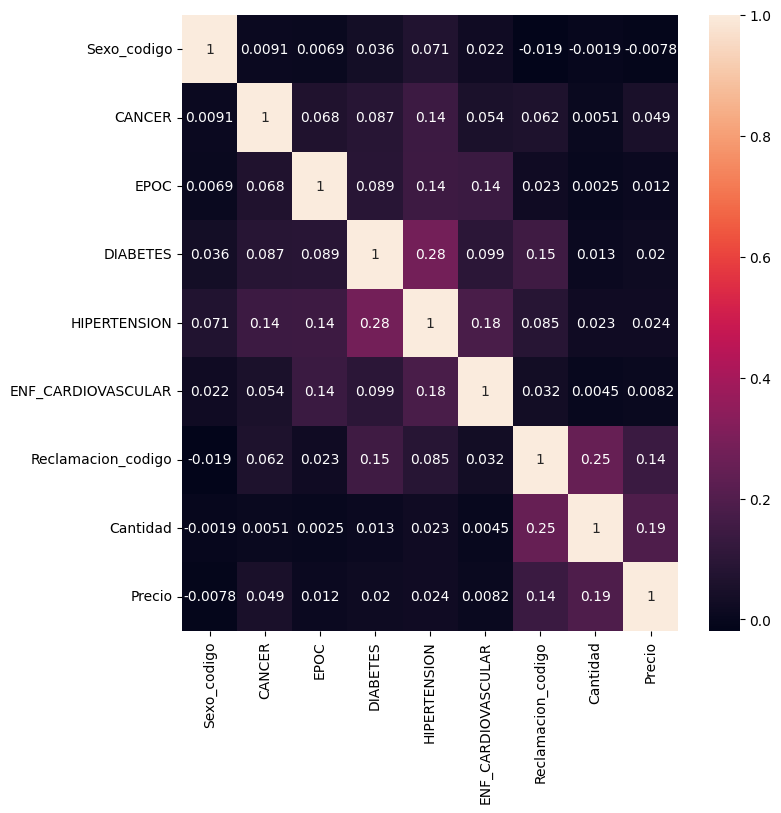

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(8,8))
sns.heatmap(df_final2.corr(),annot= True)

In [ ]:
x = df_final2.corr().unstack().sort_values()
x[x<1].tail(10)

<ipython-input-131-53193997497c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Reclamacion_codigo  DIABETES              0.152070
DIABETES            Reclamacion_codigo    0.152070
HIPERTENSION        ENF_CARDIOVASCULAR    0.177738
ENF_CARDIOVASCULAR  HIPERTENSION          0.177738
Cantidad            Precio                0.188187
Precio              Cantidad              0.188187
Cantidad            Reclamacion_codigo    0.250144
Reclamacion_codigo  Cantidad              0.250144
DIABETES            HIPERTENSION          0.282840
HIPERTENSION        DIABETES              0.282840
dtype: float64

In [ ]:
df_dummies=pd.get_dummies(df_final2)

<ipython-input-132-4bc4fc398e7f>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [ ]:
X= df_dummies.drop(["Precio"],axis = 1)
y = df_dummies.Precio

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()
dReescalados = escalador.fit_transform(X)
#set_printoptions(precision=2)
print(dReescalados)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler().fit(X)
dEstandarizados = escalador.transform(X)
dEstandarizados

array([[ 1.302, -0.203, -0.104, ..., -0.055, -0.136, -0.137],
       [ 1.302, -0.203, -0.104, ..., -0.055, -0.136, -0.137],
       [ 1.302, -0.203, -0.104, ..., -0.055, -0.136, -0.137],
       ...,
       [ 1.302, -0.203, -0.104, ..., -0.055, -0.136, -0.137],
       [-0.768, -0.203, -0.104, ..., -0.055, -0.136, -0.137],
       [-0.768, -0.203, -0.104, ..., -0.055, -0.136, -0.137]])

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
escalador = Normalizer().fit(X)
dEstandarizados = escalador.transform(X)
dEstandarizados

array([[0.121, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.108, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.108, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.108, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [ ]:
df_dummies = df_dummies.drop(columns=["Precio"])
df_dummies

,Sexo_codigo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion_codigo,Cantidad,Regional_codigo_1,Regional_codigo_2,Regional_codigo_3,Regional_codigo_4,Regional_codigo_5,Regional_codigo_6,Diagnostico_Codigo_9,Diagnostico_Codigo_E039,Diagnostico_Codigo_E139,Diagnostico_Codigo_Z017,Diagnostico_Codigo_Z108
0,1,0,0,0,0,0,8,1,1,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,8,1,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,9,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390986,1,0,0,0,0,0,8,1,0,0,0,1,0,0,1,0,0,0,0
390988,1,0,0,0,0,0,12,1,0,0,0,1,0,0,1,0,0,0,0
390989,1,0,0,0,0,0,9,1,0,0,0,1,0,0,1,0,0,0,0
390990,0,0,0,0,0,0,12,1,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
#Crear un modelo de selección
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

est_prueba = SelectKBest(score_func=f_classif, k='all')
est_ajustado = est_prueba.fit(X,y)

#Muestro el desempeño de los features basado en el valor F
set_printoptions(precision=3, suppress= True)
est_ajustado.scores_

array([ 1.375,  1.44 ,  1.422,  1.81 ,  1.487,  1.461, 29.164, 39.938,
        4.091,  3.554,  3.682,  3.36 ,  2.395,  0.848, 17.558, 17.636,
       27.605, 19.116,  4.619])

##Modelos:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
test_size=0.33
seed=6
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, Y_train)
regresion_lineal.score(X_test,Y_test)

0.06073797249516277

In [ ]:
y_pred = regresion_lineal.predict(X_test) #predicción
y_pred

array([101623.705, 129332.297, 129332.297, ..., 111194.408,  99882.417,
       441974.095])

In [ ]:
from sklearn.inspection import permutation_importance
import multiprocessing
importancia = permutation_importance(
                estimator    = regresion_lineal,
                X            = X_train,
                y            = Y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
6,7011.821531,43.087075,Reclamacion_codigo
7,4574.204743,49.606296,Cantidad
14,1772.188365,13.085047,Diagnostico_Codigo_9
15,1545.362719,26.197639,Diagnostico_Codigo_E039
17,892.966533,30.647714,Diagnostico_Codigo_Z017
1,391.808796,11.265444,CANCER
18,332.641680,13.687514,Diagnostico_Codigo_Z108
9,203.593057,17.491080,Regional_codigo_2
8,45.429408,8.080699,Regional_codigo_1
0,18.417762,6.063328,Sexo_codigo


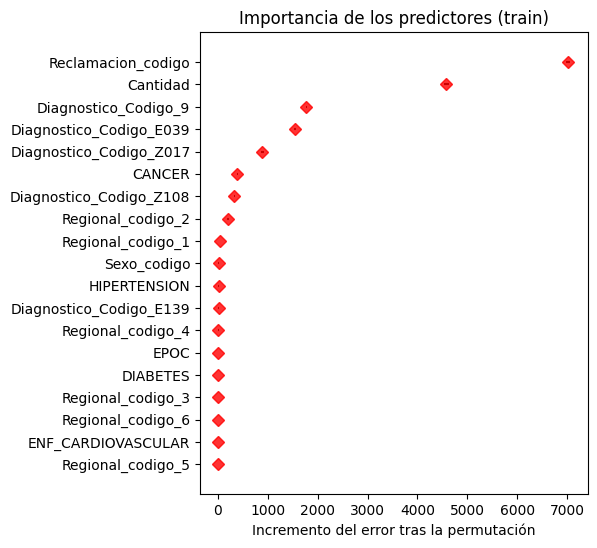

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

In [ ]:
print("Intercept:", regresion_lineal.intercept_)
print("coeficiente", list(zip(X.columns, regresion_lineal.coef_.flatten(), )))
print("R^2", regresion_lineal.score(X,y))

Intercept: -97293.29528026667
coeficiente [('Sexo_codigo', -4225.508666478698), ('CANCER', 48788.22655292489), ('EPOC', 11482.105539790442), ('DIABETES', 4407.431616185771), ('HIPERTENSION', 5835.985821314255), ('ENF_CARDIOVASCULAR', -901.1365190808638), ('Reclamacion_codigo', 11225.129571996913), ('Cantidad', 13387.063992784522), ('Regional_codigo_1', 8608.265076312115), ('Regional_codigo_2', -13928.855838718317), ('Regional_codigo_3', 1342.76941563102), ('Regional_codigo_4', -4291.841890636144), ('Regional_codigo_5', -962.4382649323362), ('Regional_codigo_6', 9232.101502343436), ('Diagnostico_Codigo_9', 96691.33774616192), ('Diagnostico_Codigo_E039', -233081.83013195574), ('Diagnostico_Codigo_E139', -38956.55422574353), ('Diagnostico_Codigo_Z017', 109451.77100510264), ('Diagnostico_Codigo_Z108', 65895.27560643513)]
R^2 0.05633875987849046


Metricas